In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('updated_neo_data.csv', header=0)
df

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,...,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,is_potentially_hazardous_asteroid,fullname
0,2003 YG136,8,2.453007e+06,2004-Jan-02 02:01,0.018890,0.018803,0.018978,11.349593,11.337158,< 00:01,...,86.207749,348.691948,0.625239,128.194452,1.313826,2.460391e+06,9.713622,1.032430,False,(2003 YG136)
1,2004 AD1,17,2.453008e+06,2004-Jan-03 11:52,0.039728,0.039727,0.039730,12.361220,12.355793,< 00:01,...,299.662780,967.229294,0.836564,110.388437,2.991543,2.460712e+06,243.957504,0.372197,False,(2004 AD1)
2,2004 AD,18,2.453008e+06,2004-Jan-03 19:13,0.027346,0.027345,0.027347,7.312034,7.298697,< 00:01,...,110.475691,515.565713,0.927806,302.541968,1.588830,2.460188e+06,148.511825,0.698262,False,(2004 AD)
3,2022 EH4,5,2.453016e+06,2004-Jan-11 07:07,0.024726,0.019411,0.115374,7.153503,7.138423,8_05:32,...,250.137012,284.985995,0.603129,82.970020,1.091912,2.460341e+06,75.612376,1.263220,False,(2022 EH4)
4,2004 BA75,9,2.453018e+06,2004-Jan-13 13:11,0.020793,0.020499,0.021088,17.336109,17.328716,00:49,...,135.020368,764.868240,0.652319,253.535023,2.621254,2.452970e+06,29.990189,0.470669,False,(2004 BA75)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350,2024 JA3,13,2.460461e+06,2024-May-30 01:37,0.015953,0.015927,0.015978,8.487609,8.467907,00:02,...,64.665199,460.913560,0.878329,257.496492,1.457157,2.460521e+06,265.705826,0.781058,False,(2024 JA3)
15351,2024 LB,7,2.460461e+06,2024-May-30 09:46,0.019933,0.019873,0.019994,5.228769,5.203142,< 00:01,...,250.013676,517.434001,1.016519,334.800307,1.506193,2.460438e+06,333.841061,0.695741,False,(2024 LB)
15352,2024 KY,6,2.460461e+06,2024-May-30 19:16,0.009577,0.009565,0.009589,7.175492,7.136614,< 00:01,...,69.217708,470.559062,0.958144,129.309828,1.409813,2.460415e+06,348.582819,0.765047,False,(2024 KY)
15353,2024 KX,2,2.460462e+06,2024-May-31 03:42,0.001944,0.001940,0.001947,8.251181,8.083329,< 00:01,...,69.575438,316.062464,0.698943,311.866742,1.117184,2.460558e+06,180.824177,1.139015,False,(2024 KX)


In [23]:
nan_count = np.sum(df.isnull(),axis = 0) # checking amount of NaN values
nan_count

des                                    0
orbit_id                               0
jd                                     0
cd                                     0
dist                                   0
dist_min                               0
dist_max                               0
v_rel                                  0
v_inf                                 17
t_sigma_f                              0
h                                      2
estimated_diameter_min_km            272
estimated_diameter_max_km            272
data_arc_in_days                     544
observations_used                    272
orbit_uncertainty                    272
minimum_orbit_intersection           272
jupiter_tisserand_invariant          272
epoch_osculation                     272
eccentricity                         272
semi_major_axis                      272
inclination                          272
ascending_node_longitude             272
orbital_period                       272
perihelion_dista

In [24]:
df = df.dropna() # dropping rows with NaN values

In [25]:
nan_count = np.sum(df.isnull(),axis = 0) # checking amount of NaN values
nan_count

des                                  0
orbit_id                             0
jd                                   0
cd                                   0
dist                                 0
dist_min                             0
dist_max                             0
v_rel                                0
v_inf                                0
t_sigma_f                            0
h                                    0
estimated_diameter_min_km            0
estimated_diameter_max_km            0
data_arc_in_days                     0
observations_used                    0
orbit_uncertainty                    0
minimum_orbit_intersection           0
jupiter_tisserand_invariant          0
epoch_osculation                     0
eccentricity                         0
semi_major_axis                      0
inclination                          0
ascending_node_longitude             0
orbital_period                       0
perihelion_distance                  0
perihelion_argument      

### Creating Orbit Path Visualizations between Hazardous and Non-Hazardous NEOs

In [26]:
hazardous_neos = df[df['is_potentially_hazardous_asteroid'] == True]
non_hazardous_neos = df[df['is_potentially_hazardous_asteroid'] == False]

hazardous_sample = hazardous_neos.sample(n = 3)
non_hazardous_sample = non_hazardous_neos.sample(n = 3)

selected_neos = pd.concat([hazardous_sample, non_hazardous_sample])

In [27]:
neo_orbital_data = selected_neos[['fullname', 'semi_major_axis','perihelion_distance', 'eccentricity', 'inclination', 'ascending_node_longitude', 'perihelion_argument']].dropna()

In [28]:
neo_orbital_data_list = neo_orbital_data.values.tolist()

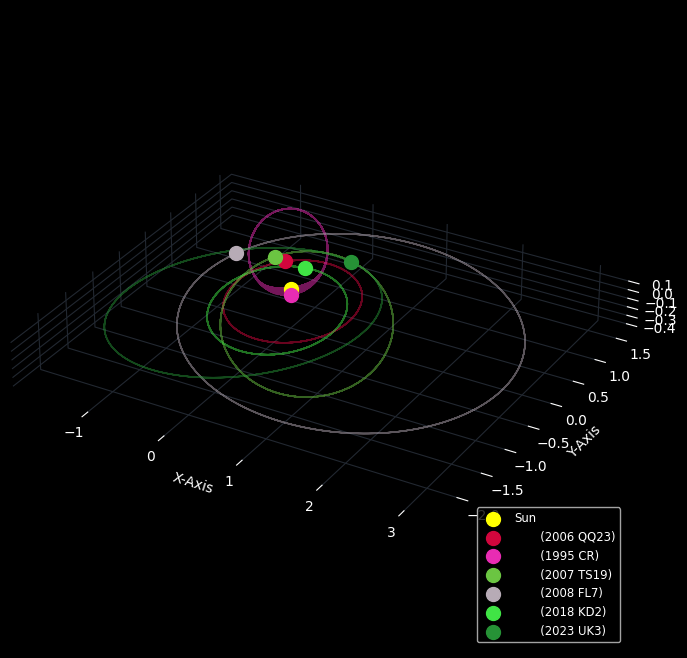

In [29]:
# https://pypi.org/project/orbitronomy/
# https://medium.com/@stormbee/python-in-space-a-beginners-guide-to-decoding-planetary-orbits-6dab1ccba292

from orbitronomy.orbitCalcs import SimpleOrbit
import os

if not os.path.exists("results"):
    os.makedirs("results")

test = SimpleOrbit(plot_title="Test", name="Non-Hazardous vs. Hazardous NEO Orbit Paths")

test.faceColor("black")
test.paneColor("black")
test.gridColor("#222831")
test.orbitTransparency(0.5)
test.labelColor("white")
test.tickColor("white")

test.plotStyle(background_color="dark_background")

# the form of the "data" list should be as follows: 
# "name", semi_major_axis, perihelion, eccentricity, inclination, longitude_of_ascending_node, argument_of_perihelion, color (optional)

# calculating and plotting orbits
test.calculateOrbit(plot_steps=1000, n_orbits=1, data=neo_orbital_data_list, trajectory=True, sun=True)
test.xLabel("X-Axis")
test.yLabel("Y-Axis")
test.zLabel("Z-Axis")

test.animateOrbit(dpi=300, save=False, export_zoom=3, font_size="small", export_folder="results", animation_interval=10)
# not able to produce gif 

In [30]:
print('Hazardous NEOs:', ", ".join(hazardous_sample['fullname'].tolist()))
print('Non-Hazardous NEOs:', ", ".join(non_hazardous_sample['fullname'].tolist()))

Hazardous NEOs:        (2006 QQ23),        (1995 CR),        (2007 TS19)
Non-Hazardous NEOs:        (2008 FL7),        (2018 KD2),        (2023 UK3)


### Data Preparation and Pre-Processing

In [31]:
df.dtypes

des                                   object
orbit_id                              object
jd                                   float64
cd                                    object
dist                                 float64
dist_min                             float64
dist_max                             float64
v_rel                                float64
v_inf                                float64
t_sigma_f                             object
h                                    float64
estimated_diameter_min_km            float64
estimated_diameter_max_km            float64
data_arc_in_days                     float64
observations_used                    float64
orbit_uncertainty                    float64
minimum_orbit_intersection           float64
jupiter_tisserand_invariant          float64
epoch_osculation                     float64
eccentricity                         float64
semi_major_axis                      float64
inclination                          float64
ascending_

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14794 entries, 0 to 15354
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   des                                14794 non-null  object 
 1   orbit_id                           14794 non-null  object 
 2   jd                                 14794 non-null  float64
 3   cd                                 14794 non-null  object 
 4   dist                               14794 non-null  float64
 5   dist_min                           14794 non-null  float64
 6   dist_max                           14794 non-null  float64
 7   v_rel                              14794 non-null  float64
 8   v_inf                              14794 non-null  float64
 9   t_sigma_f                          14794 non-null  object 
 10  h                                  14794 non-null  float64
 11  estimated_diameter_min_km          14794 non-null  float64


In [33]:
# renaming columns for readability
df.rename(columns={
    'estimated_diameter_max_km': 'max_diameter_km',
    'estimated_diameter_min_km': 'min_diameter_km',
    'observations_used': 'obs_used',
    'data_arc_in_days': 'data_arc_days',
    'v_inf': 'velocity_inf',
    'v_rel': 'velocity_rel',
    'inclination': 'incl',
    'dist_min': 'min_dist',
    'dist': 'distance',
    'eccentricity': 'ecc',
    'orbit_uncertainty': 'orbit_unc',
    'h': 'absolute_mag',
    'is_potentially_hazardous_asteroid': 'is_hazardous'
}, inplace=True)

C:\Users\natnj\AppData\Local\Temp\ipykernel_34384\1187596527.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# merging 'max_diameter_km' and 'min_diameter_km' into a single column
df['avg_diameter_km'] = df[['max_diameter_km','min_diameter_km']].mean(axis=1)
df = df.drop(columns=['min_diameter_km', 'max_diameter_km'])
avg_diameter = df.pop('avg_diameter_km')
df.insert(9, 'avg_diameter_km', avg_diameter)
df.columns

C:\Users\natnj\AppData\Local\Temp\ipykernel_34384\2591641257.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['des', 'orbit_id', 'jd', 'cd', 'distance', 'min_dist', 'dist_max',
       'velocity_rel', 'velocity_inf', 'avg_diameter_km', 't_sigma_f',
       'absolute_mag', 'data_arc_days', 'obs_used', 'orbit_unc',
       'minimum_orbit_intersection', 'jupiter_tisserand_invariant',
       'epoch_osculation', 'ecc', 'semi_major_axis', 'incl',
       'ascending_node_longitude', 'orbital_period', 'perihelion_distance',
       'perihelion_argument', 'aphelion_distance', 'perihelion_time',
       'mean_anomaly', 'mean_motion', 'is_hazardous', 'fullname'],
      dtype='object')

In [35]:
df = df.drop(columns=['des','fullname','orbit_id','cd','t_sigma_f']) # dropping columns that may be irrelevant for prediction
df.columns

Index(['jd', 'distance', 'min_dist', 'dist_max', 'velocity_rel',
       'velocity_inf', 'avg_diameter_km', 'absolute_mag', 'data_arc_days',
       'obs_used', 'orbit_unc', 'minimum_orbit_intersection',
       'jupiter_tisserand_invariant', 'epoch_osculation', 'ecc',
       'semi_major_axis', 'incl', 'ascending_node_longitude', 'orbital_period',
       'perihelion_distance', 'perihelion_argument', 'aphelion_distance',
       'perihelion_time', 'mean_anomaly', 'mean_motion', 'is_hazardous'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # converting label column to numerical format i.e 0 or 1
df['is_hazardous'] = label_encoder.fit_transform(df['is_hazardous'])
df.columns

Index(['jd', 'distance', 'min_dist', 'dist_max', 'velocity_rel',
       'velocity_inf', 'avg_diameter_km', 'absolute_mag', 'data_arc_days',
       'obs_used', 'orbit_unc', 'minimum_orbit_intersection',
       'jupiter_tisserand_invariant', 'epoch_osculation', 'ecc',
       'semi_major_axis', 'incl', 'ascending_node_longitude', 'orbital_period',
       'perihelion_distance', 'perihelion_argument', 'aphelion_distance',
       'perihelion_time', 'mean_anomaly', 'mean_motion', 'is_hazardous'],
      dtype='object')

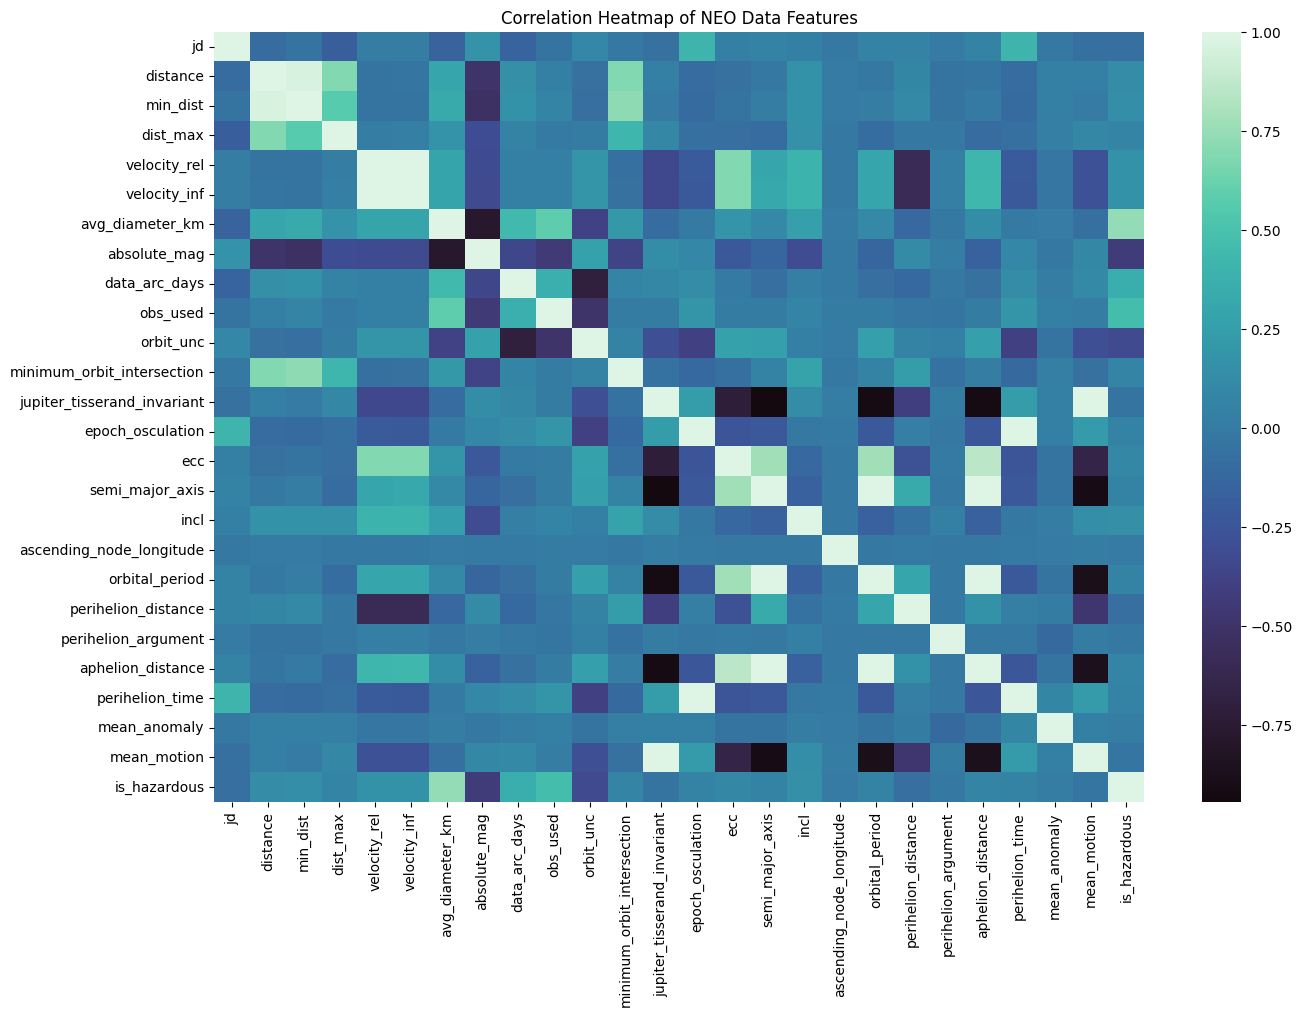

In [37]:
plt.style.use('default')
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=False, cmap='mako', center=0)
plt.title('Correlation Heatmap of NEO Data Features')
plt.savefig('correlation_features_heatmap.png')
plt.show()

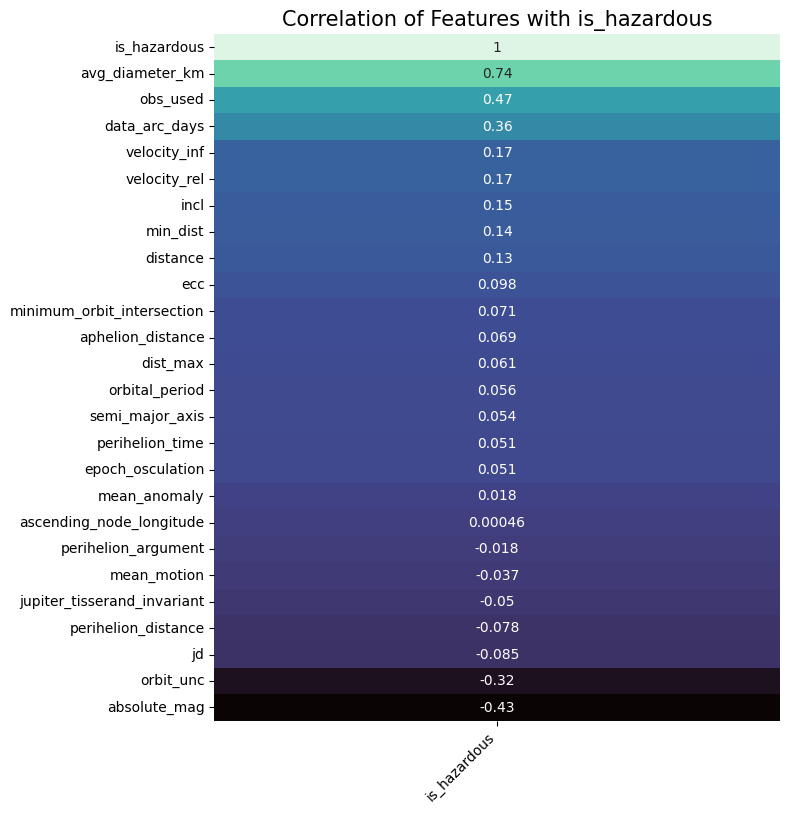

In [38]:
filtered_corr_matrix = correlation_matrix[['is_hazardous']].sort_values(by='is_hazardous',ascending=False)
plt.figure(figsize=(8,8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='mako', cbar=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Correlation of Features with is_hazardous', fontsize=15)
plt.savefig('correlation_features_and_label_heatmap.png', bbox_inches='tight')
plt.show()

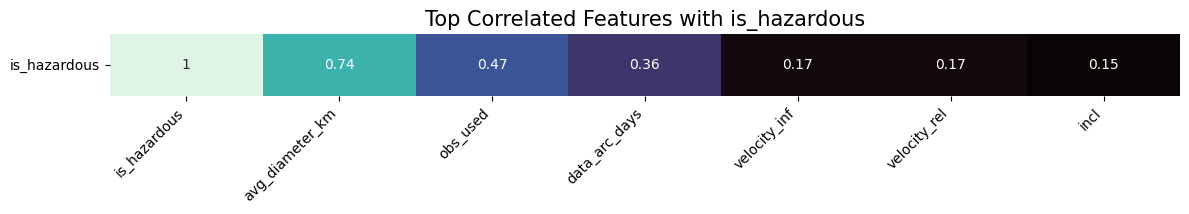

In [85]:
# horizontal for poster
n = 7
filtered_corr_matrix = correlation_matrix[['is_hazardous']].sort_values(by='is_hazardous', ascending=False).head(n)

plt.figure(figsize=(12, 2))
sns.heatmap(filtered_corr_matrix.T, annot=True, cmap='mako', cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Top Correlated Features with is_hazardous', fontsize=15)
plt.savefig('top_correlated_features_with_is_hazardous_heatmap.png', bbox_inches='tight')
plt.show()

Strongest Correlations: 
avg_diameter_km_ (0.74)
obs_used (0.47)
data_arc_days_ (0.36)
absolute_mag_ (-0.43)
orbit_unc (-0.32)

In [39]:
tf_counts = df['is_hazardous'].value_counts() # finding how many neo's are potentially hazardous and how many aren't
tf_counts

is_hazardous
0    14445
1      349
Name: count, dtype: int64

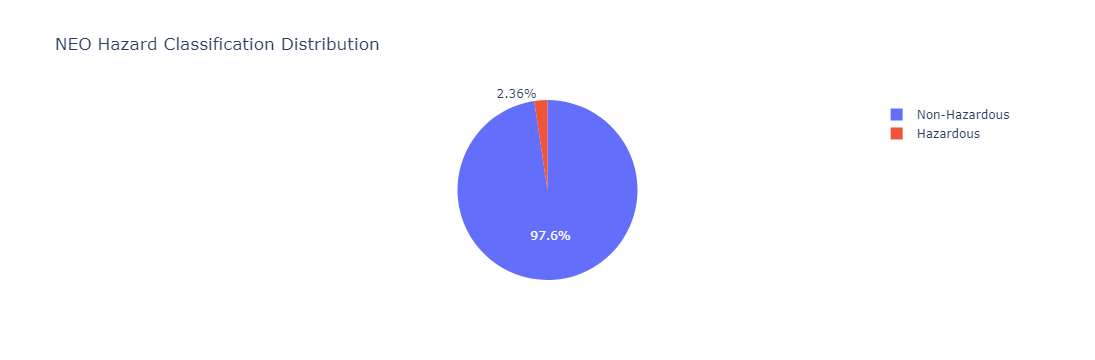

In [88]:
import plotly.express as px

labels = ['Non-Hazardous','Hazardous']
sizes = [14445, 349]
fig = px.pie(values=tf_counts, names=labels, title="NEO Hazard Classification Distribution")
fig.show()

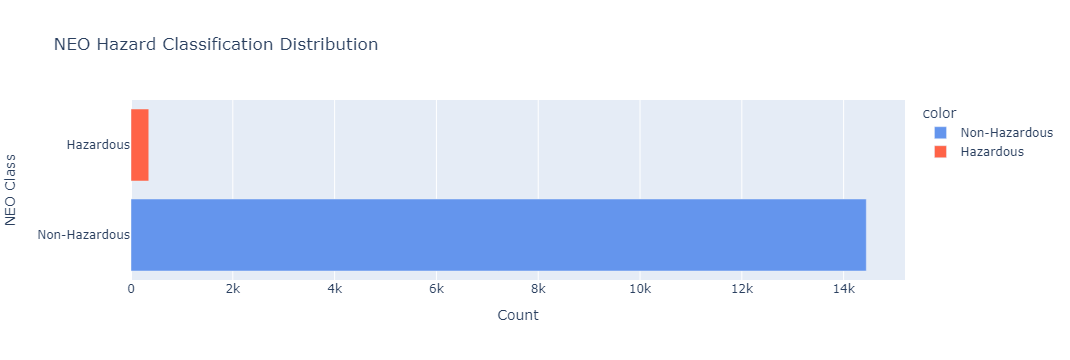

<Figure size 640x480 with 0 Axes>

In [103]:
tf_counts = sizes  
labels = ['Non-Hazardous', 'Hazardous']

fig = px.bar(x=tf_counts, y=labels, orientation='h', 
             title="NEO Hazard Classification Distribution",
             labels={'x':'Count', 'y':'NEO Class'},
             color=labels, color_discrete_sequence=['cornflowerblue', 'tomato'])


fig.show()
plt.savefig('neo_label.png', bbox_inches='tight')

# Modeling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline, make_pipeline

In [42]:
X = df.drop(columns=['is_hazardous']) # features
y = df['is_hazardous'] # target variable

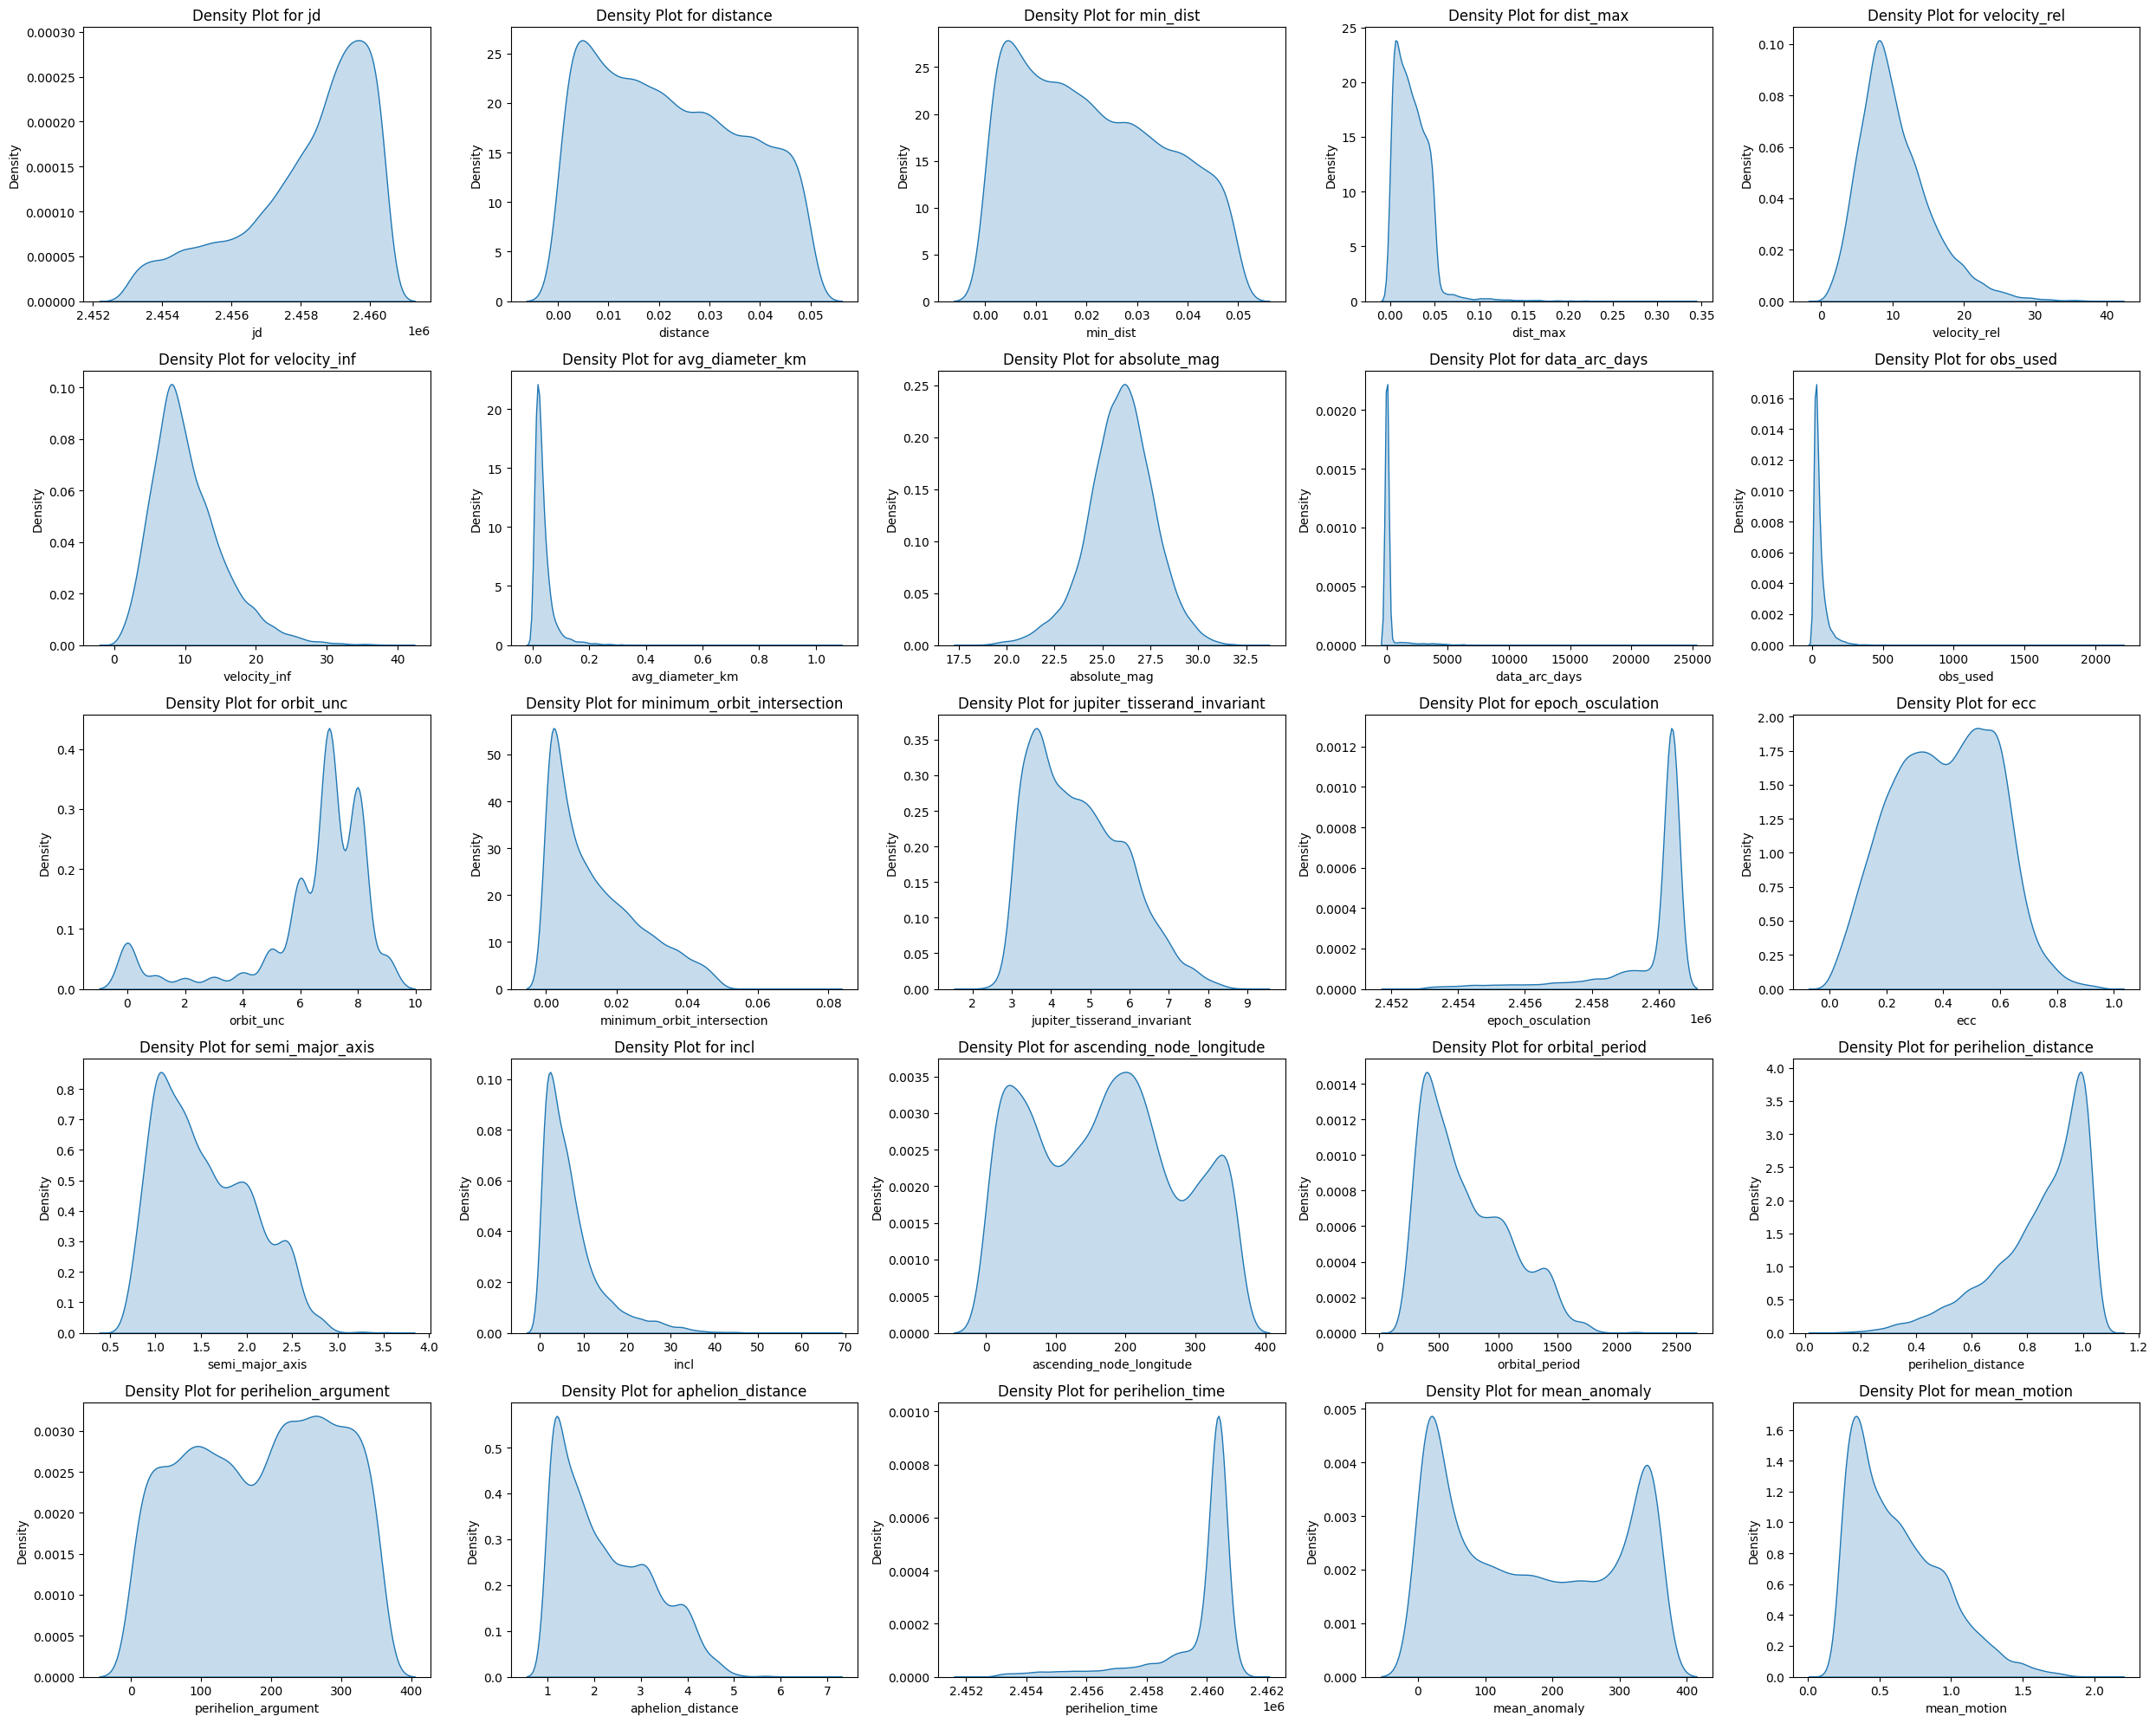

In [43]:
# density plots
n_features_per_row = 5
n_rows = int(np.ceil(len(X.columns) / n_features_per_row)) # number of rows needed 
fig, axes = plt.subplots(n_rows, n_features_per_row, figsize=(n_features_per_row*5, n_rows*4))

for i, column in enumerate(X.columns):
    row, col = divmod(i, n_features_per_row)
    sns.kdeplot(X[column], fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Density Plot for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')

for j in range(i + 1, n_rows * n_features_per_row):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.savefig('density_plots_features.png', bbox_inches='tight')
plt.show()

In [44]:
# stratified splitting to keep same percentage of classes in each split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [45]:
# because of large class imbalance and the positive class (hazardous) is the more important class label
# false negatives, where a hazardous NEO is incorrectly predicted as non-hazardous is most important
# metric to look out for the most is F2 measure
#  https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

### Feature Scaling

In [46]:
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [47]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical_cols].describe()
col_names_to_scale = numerical_cols

In [48]:
X_train = Standard_Scaler(X_train, col_names_to_scale)
X_test = Standard_Scaler(X_test, col_names_to_scale)

In [49]:
# function to plot learning curve for each model
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Random Forest Classifier using Stratified K-Fold Cross-Validation

In [50]:
kf = StratifiedKFold(n_splits=5, shuffle=False) # ensures we have same splits of data every time
rf = RandomForestClassifier(n_estimators=100, random_state=13) # focus model

In [51]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [1.         0.98214286 0.96428571 0.94642857 0.94545455]
Average Cross Validation Recall score: 0.9676623376623377


### Random Forest Classifier using GridSearchCV and Stratified K-Fold Cross-Validation

In [52]:
# hyperparameter tuning using GridSearchCV
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

# evaluating on training set
grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 4, 'n_estimators': 50, 'random_state': 13}
Best score: 0.9676623376623377


In [53]:
# evaluating on test set
y_pred = grid_rf.predict(X_test) # optimized rf is used
cm = confusion_matrix(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_f2 = fbeta_score(y_test, y_pred, beta=2)
print('Conufusion Matrix:', cm)

Conufusion Matrix: [[2889    0]
 [   0   70]]


In [54]:
rf_metrics = [(rf_recall, rf_precision, rf_f1, rf_f2, rf_accuracy)]
rf_score = pd.DataFrame(data = rf_metrics, columns=['Recall','Precision','F1 Score', 'F2 Score','Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,F2 Score,Accuracy
0,No Under/Oversampling,1.0,1.0,1.0,1.0,1.0


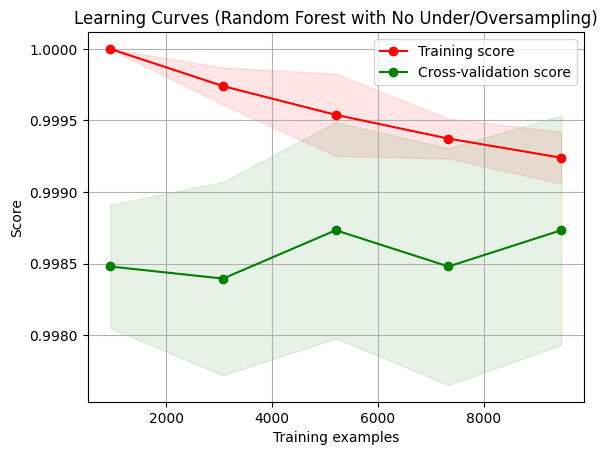

In [55]:
best_rf = grid_rf.best_estimator_
title = "Learning Curves (Random Forest with No Under/Oversampling)"
plot_learning_curve(best_rf, title, X_train, y_train, cv=kf)
plt.show()

### Random Forest Classifier using Random Oversampling and Stratified K-Fold Cross-Validation

In [56]:
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Non-Hazardous:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Hazardous:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Non-Hazardous: 11556 / 50.0 % of the dataset
Hazardous: 11556 / 50.0 % of the dataset


In [57]:
random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42),RandomForestClassifier(n_estimators=100, random_state=13))
score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [1.         0.98214286 0.96428571 0.94642857 0.98181818]
Average Cross Validation Recall score: 0.974935064935065


### Random Forest Classifier using Random Oversampling, GridSearchCV and Stratified K-Fold Cross-Validation

In [58]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True)
grid_over_rf.fit(X_train, y_train)
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__random_state': 13}
Best score: 0.9928571428571429


In [59]:
y_pred = grid_over_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
over_rf_recall = recall_score(y_test, y_pred)
over_rf_precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)
over_rf_f2 = fbeta_score(y_test, y_pred, beta=2)
print(cm)

[[2884    5]
 [   0   70]]


In [60]:
ndf = [(over_rf_recall, over_rf_precision, over_rf_f1, over_rf_f2, over_rf_accuracy)]
over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'F2 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,F2 Score,Accuracy
0,Random Oversampling,1.0,0.933333,0.965517,0.985915,0.99831


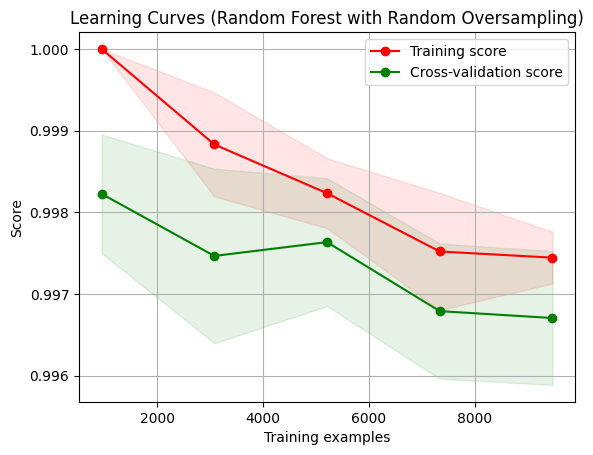

In [61]:
best_rf = grid_over_rf.best_estimator_
title = "Learning Curves (Random Forest with Random Oversampling)"
plot_learning_curve(best_rf, title, X_train, y_train, cv=kf)
plt.show()

### Random Forest Classifier using Random Undersampling and Stratified K-Fold Cross-Validation

In [62]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)
print('Non-Hazardous:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Hazardous:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Non-Hazardous: 279 / 50.0 % of the dataset
Hazardous: 279 / 50.0 % of the dataset


In [63]:
# Since there's only 558 objects in this dataset, it's best not to use this technique

### Random Forest Classifier using SMOTE and Stratified K-Fold Cross-Validation

In [64]:
smote_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators=100, random_state=13))
score3 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [1.         1.         0.96428571 0.96428571 0.98181818]
Average Cross Validation Recall score: 0.9820779220779221


### Random Forest Classifier using SMOTE, GridSearchCV and Stratified K-Fold Cross-Validation

In [65]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True)
smote_rf.fit(X_train, y_train)
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.9928571428571429


In [66]:
y_pred = smote_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
smote_rf_recall = recall_score(y_test, y_pred)
smote_rf_precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)
smote_rf_f2 = fbeta_score(y_test, y_pred, beta=2)
print(cm)

[[2880    9]
 [   0   70]]


In [67]:
ndf = [(smote_rf_recall, smote_rf_precision, smote_rf_f1, smote_rf_f2, smote_rf_accuracy)]
smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'F2 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,F2 Score,Accuracy
0,SMOTE Oversampling,1.0,0.886076,0.939597,0.97493,0.996958


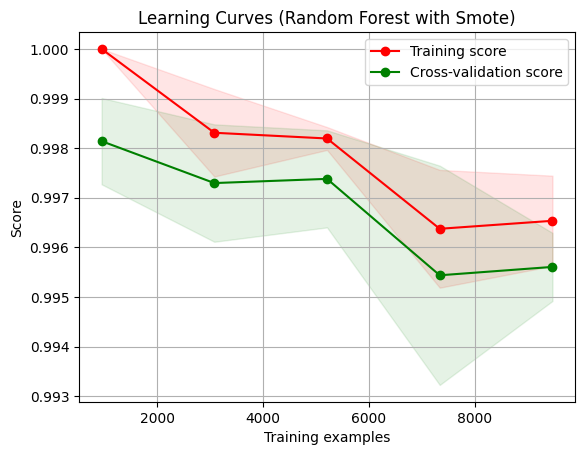

In [68]:
best_rf = smote_rf.best_estimator_
title = "Learning Curves (Random Forest with Smote)"
plot_learning_curve(best_rf, title, X_train, y_train, cv=kf)
plt.show()

### Random Forest Classifier using Tomek Links, SMOTE and Stratified K-Fold Cross-Validation

In [69]:
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), RandomForestClassifier(n_estimators=100, random_state=13))
score4 = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='recall', cv=kf) 
print("Cross Validation Recall Scores are: {}".format(score4))
print("Average Cross Validation Recall score: {}".format(score4.mean()))

Cross Validation Recall Scores are: [1.         1.         0.96428571 0.96428571 0.98181818]
Average Cross Validation Recall score: 0.9820779220779221


### Random Forest Classifier using Tomek Links, SMOTE, GridSearchCV and Stratified K-Fold Cross-Validation

In [70]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
SMOTETomek_rf = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True) 
SMOTETomek_rf.fit(X_train, y_train)
print('Best parameters:', SMOTETomek_rf.best_params_)
print('Best score:', SMOTETomek_rf.best_score_)

y_pred = SMOTETomek_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
SMOTETomek_rf_recall = recall_score(y_test, y_pred)
SMOTETomek_rf_precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)
SMOTETomek_rf_f2 = fbeta_score(y_test, y_pred, beta=2)
print(cm)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.9928571428571429
[[2879   10]
 [   0   70]]


In [71]:
ndf = [(SMOTETomek_rf_recall, SMOTETomek_rf_precision, SMOTETomek_rf_f1, SMOTETomek_rf_f2, SMOTETomek_rf_accuracy)]
SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'F2 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,F2 Score,Accuracy
0,SMOTE + Tomek,1.0,0.875,0.933333,0.972222,0.99662


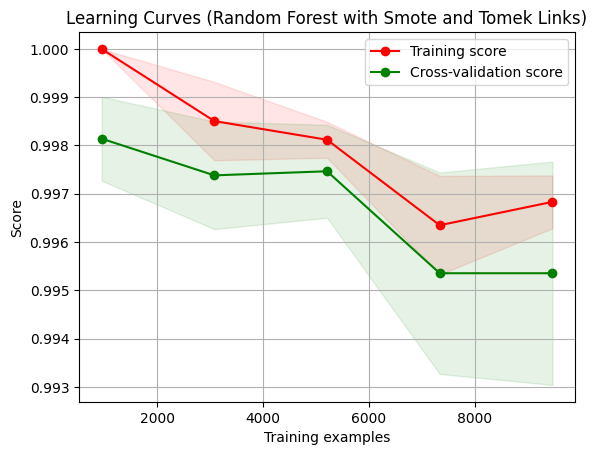

In [72]:
best_rf = SMOTETomek_rf.best_estimator_
title = "Learning Curves (Random Forest with Smote and Tomek Links)"
plot_learning_curve(best_rf, title, X_train, y_train, cv=kf)
plt.show()

### Random Forest Classifier using Class Weights

In [73]:
rfb = RandomForestClassifier(n_estimators=100, random_state=13, class_weight="balanced")
score5 = cross_val_score(rfb, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

Cross Validation Recall scores are: [1.         0.98214286 0.96428571 0.94642857 0.98181818]
Average Cross Validation Recall score: 0.974935064935065


### Random Forest Classifier using Class Weights, GridSearchCV and Stratified K-Fold Cross-Validation

In [74]:
grid_rfb = GridSearchCV(rfb, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)
y_pred = grid_rfb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
grid_rfb_recall = recall_score(y_test, y_pred)
grid_rfb_precision = precision_score(y_test, y_pred)
grid_rfb_f1 = f1_score(y_test, y_pred)
grid_rfb_accuracy = accuracy_score(y_test, y_pred)
grid_rfb_f2 = fbeta_score(y_test, y_pred, beta=2)
print(cm)

[[2885    4]
 [   0   70]]


In [75]:
ndf = [(grid_rfb_recall, grid_rfb_precision, grid_rfb_f1, grid_rfb_f2, grid_rfb_accuracy)]
grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'F2 Score', 'Accuracy'])
grid_rfb_score.insert(0, 'Random Forest with', 'Class weights')
grid_rfb_score

,Random Forest with,Recall,Precision,F1 Score,F2 Score,Accuracy
0,Class weights,1.0,0.945946,0.972222,0.988701,0.998648


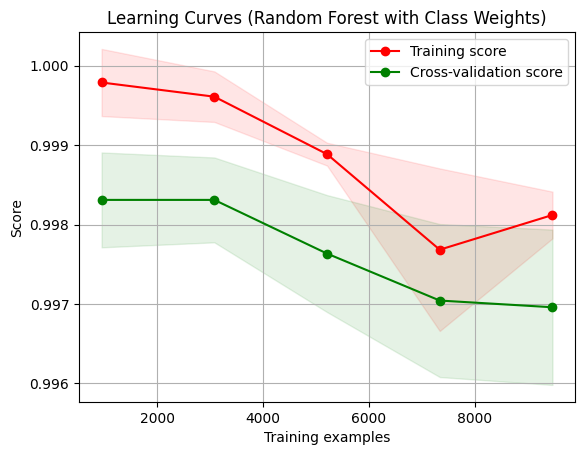

In [76]:
best_rf = grid_rfb.best_estimator_
title = "Learning Curves (Random Forest with Class Weights)"
plot_learning_curve(best_rf, title, X_train, y_train, cv=kf)
plt.show()

# Results

In [83]:
predictions = pd.concat([rf_score, over_rf_score, smote_rf_score, SMOTETomek_rf_score, grid_rfb_score], ignore_index=True, sort=False)
results = predictions.sort_values(by=['F2 Score'], ascending=False)
results.to_csv('results.csv')
results

,Random Forest with,Recall,Precision,F1 Score,F2 Score,Accuracy
0,No Under/Oversampling,1.0,1.000000,1.000000,1.000000,1.000000
4,Class weights,1.0,0.945946,0.972222,0.988701,0.998648
1,Random Oversampling,1.0,0.933333,0.965517,0.985915,0.998310
2,SMOTE Oversampling,1.0,0.886076,0.939597,0.974930,0.996958
3,SMOTE + Tomek,1.0,0.875000,0.933333,0.972222,0.996620
